Saving PCM_14052025.csv to PCM_14052025.csv
Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Type of the building              34 non-null     float64
 1   Size [m2]                         34 non-null     float64
 2   Rate per m2 [€]                   34 non-null     float64
 3   Duration [years]                  34 non-null     float64
 4   Initial budget [€]                34 non-null     float64
 5   Exceeded                          34 non-null     float64
 6   Complexity                        34 non-null     float64
 7   No. of Architects                 34 non-null     float64
 8   Design phase time [hours]         34 non-null     float64
 9   k (arc) - value                   36 non-null     float64
 10  No. of Civil Engineers            34 non-null     float64
 11  Const

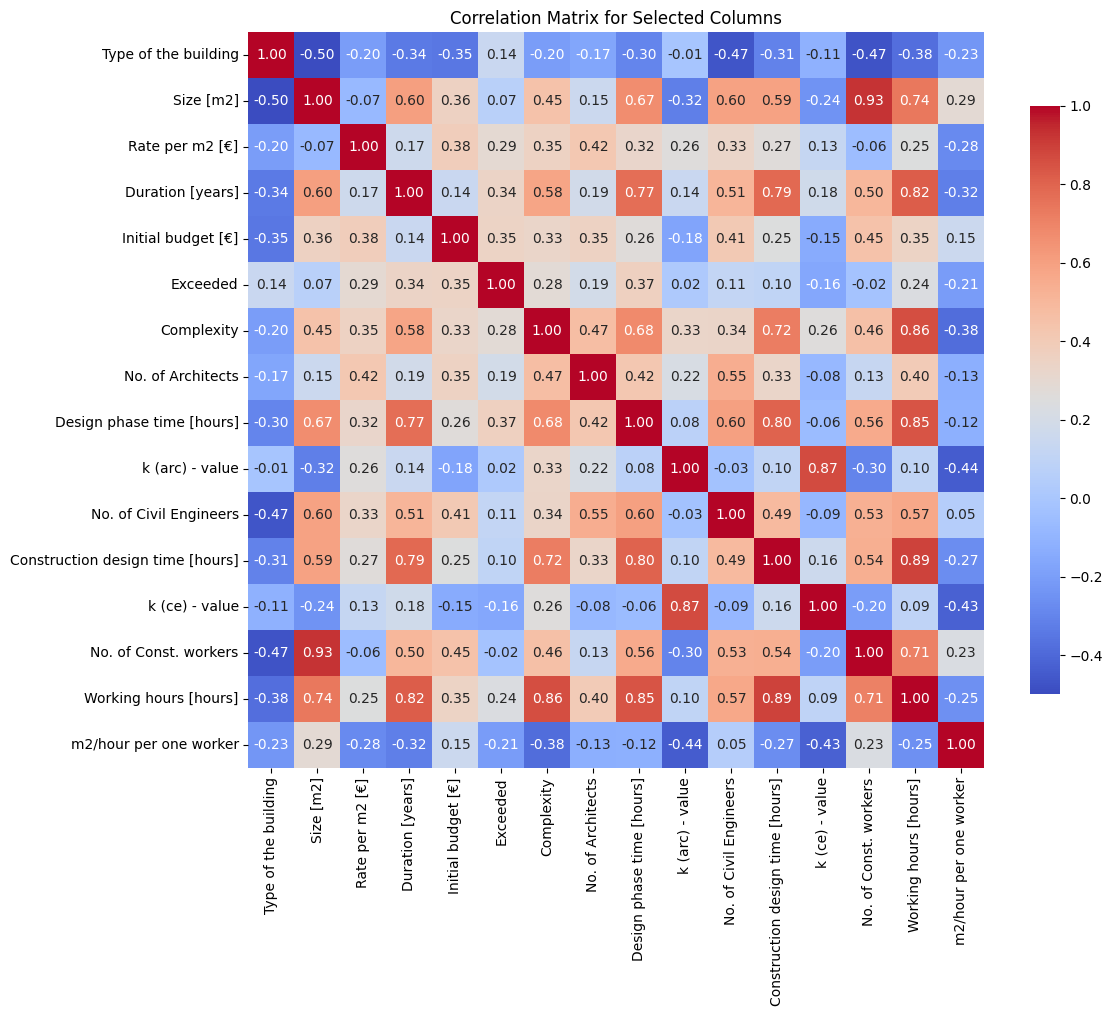

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Uploading the file
uploaded = files.upload()
filename = 'PCM_14052025.csv'

# Reading the CSV file
try:
    df = pd.read_csv(filename, encoding='utf-8-sig', on_bad_lines='skip', low_memory=False)
except UnicodeDecodeError:
    df = pd.read_csv(filename, encoding='latin1', on_bad_lines='skip', low_memory=False)

# Showing DataFrame info
print("Initial DataFrame info:")
print(df.info())
print("\nColumns in dataset:")
print(df.columns.tolist())

# Defining the columns to use
selected_columns = [
    'Type of the building',
    'Size [m2]',
    'Rate per m2 [€]',
    'Duration [years]',
    'Initial budget [€]',
    'Exceeded',
    'Complexity',
    'No. of Architects',
    'Design phase time [hours]',
    'k (arc) - value',
    'No. of Civil Engineers',
    'Construction design time [hours]',
    'k (ce) - value',
    'No. of Const. workers',
    'Working hours [hours]',
    'm2/hour per one worker'
]

# Subseting the DataFrame
available_columns = [col for col in selected_columns if col in df.columns]
missing_columns = list(set(selected_columns) - set(available_columns))
if missing_columns:
    print(f"\nWarning: The following columns were not found: {missing_columns}")

df_subset = df[available_columns].copy()

# Cleaning columns
print("\nCleaning columns...")

for col in df_subset.columns:
    if df_subset[col].dtype == 'object':
        df_subset[col] = (
            df_subset[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('€', '', regex=False)
            .str.replace('m2', '', regex=False)
            .str.replace('hours', '', regex=False)
            .str.replace('[^\d\.-]', '', regex=True)
        )
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

# Showing conversion results
print("\nData types after cleaning:")
print(df_subset.dtypes)

print("\nNaN values per column:")
print(df_subset.isnull().sum())

# Droping rows with all NaNs
initial_rows = df_subset.shape[0]
df_subset = df_subset.dropna(how='all')
print(f"\nRows before dropping all-NaN rows: {initial_rows}")
print(f"Rows after dropping all-NaN rows: {df_subset.shape[0]}")

# Droping constant columns
constant_cols = [col for col in df_subset.columns if df_subset[col].nunique(dropna=False) <= 1]
if constant_cols:
    print(f"\nDropping constant columns: {constant_cols}")
    df_subset.drop(columns=constant_cols, inplace=True)

# Checking if DataFrame is ready for correlation
if df_subset.empty or df_subset.shape[1] < 2:
    print("\nNot enough data to calculate correlation matrix.")
else:
    # Calculating the correlation matrix
    print("\nCalculating correlation matrix...")
    corr_matrix = df_subset.corr(min_periods=1)

    # Showing correlation matrix
    print("\nCorrelation matrix:")
    print(corr_matrix)

    # Ploting the heatmap
    if corr_matrix.empty or corr_matrix.isnull().all().all():
        print("\nCorrelation matrix is empty or all NaN. Skipping heatmap.")
    else:
        print("\nPlotting heatmap...")
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix for Selected Columns')
        plt.tight_layout()
        plt.show()


In [ ]:
print(df.dtypes)

Name of the building                  object
Location                              object
Company                               object
Unnamed: 3                           float64
Type of the building                  object
Size [m2]                            float64
Rate per m2 [€]                       object
Start date                            object
End date                              object
Duration [years]                     float64
Initial budget [€]                    object
Exceeded                              object
Unnamed: 12                          float64
Complexity                            object
No. of Architects                    float64
Design phase time [months]           float64
Design phase time [hours]            float64
k (arc) - value                      float64
No. of Civil Engineers               float64
Construction design time [months]    float64
Construction design time [hours]     float64
k (ce) - value                       float64
No. of Con